In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from torch.utils.data import DataLoader
!pip install --no-dependencies torchmeta==1.4.6
!pip install ordered-set
!pip install colour
from torchmeta.modules import MetaModule

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchmeta 1.4.6 requires h5py, which is not installed.
torchmeta 1.4.6 requires requests, which is not installed.
torchmeta 1.4.6 requires torchvision<0.7.0,>=0.5.0, which is not installed.
torchmeta 1.4.6 requires torch<1.6.0,>=1.4.0, but you have torch 2.2.2 which is incompatible.


ModuleNotFoundError: No module named 'h5py'

In [2]:
import sys
import os

if not os.path.isdir('automatic-integration'):
    !git clone https://www.github.com/computational-imaging/automatic-integration
    %cd automatic-integration
    
from autoint.session import Session
import autoint.autograd_modules as autoint

Cloning into 'automatic-integration'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 81 (delta 33), reused 45 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 403.85 KiB | 780.00 KiB/s, done.
Resolving deltas: 100% (33/33), done.
/Users/justinas/Documents/python/kan nets/automatic-integration


/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


ModuleNotFoundError: No module named 'h5py'

In [1]:
import torch
import torch.nn as nn
import numpy as np
import sympy as sp
from tqdm import tqdm

# Import KAN module (assuming it's available)
from kan import *  # Ensure that 'kan' is installed or available in your PYTHONPATH

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function_and_model(func, model, xmin, xmax, *args, **kwargs):
    # Generate x values from xmin to xmax
    x = np.linspace(xmin, xmax, 500)
    
    # Calculate y values for the function
    try:
        # Check if func works with numpy array
        y_func = func(x, *args, **kwargs)
    except TypeError:
        # If func requires a PyTorch tensor, convert x to tensor
        x_tensor = torch.tensor(x, dtype=torch.float32)
        y_func = func(x_tensor, *args, **kwargs).numpy()
    
    # Prepare x as a PyTorch tensor and reshape it for the model
    x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
    
    # Calculate y values for the model
    with torch.no_grad():
        y_model = model(x_tensor).numpy().flatten()
    
    # Plot both results
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_func, label=f"{func.__name__} function" if hasattr(func, '__name__') else "function")
    plt.plot(x, y_model, label=f"{model.__class__.__name__} model", linestyle='--')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Plot of function and {model.__class__.__name__} model from {xmin} to {xmax}")
    plt.legend()
    plt.grid(True)
    plt.show()








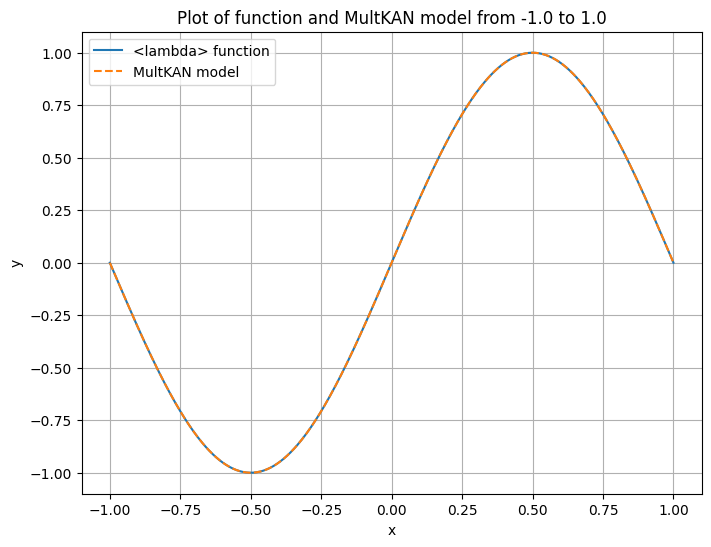

In [57]:
plot_function_and_model(f,model, -1., 1.)

In [ ]:
model(torch.tensor([1.]))

In [42]:



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)




# create dataset
f = lambda x: torch.sin(torch.pi*x[:])
dataset = create_dataset(f, n_var=1, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


In [105]:
# initialize KAN with G=3
model = KAN(width=[1,1], grid=3, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [139]:
model.parameters

<bound method Module.parameters of MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)>

In [59]:
model.fix_symbolic(0,0,0,'sin')

TypeError: 'NoneType' object is not subscriptable

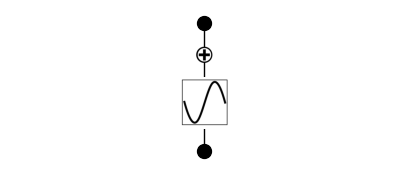

In [51]:
model.plot()

In [55]:
model.suggest_symbolic(0,0,0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0      sin    0.999896 -13.098551           2                2   -1.019710
1      cos    0.999896 -13.097797           2                2   -1.019559
2        0    0.000000   0.000014           0                0    0.000003
3        x    0.604781  -1.339240           1                1    0.532152
4      exp    0.604909  -1.339706           2                2    1.332059


('sin',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9998959898948669,
 2)

In [56]:
model.fit(dataset, opt="LBFGS", steps=200);


r2 is 0.9998959898948669
saving model version 0.2


| train_loss: 7.49e-11 | test_loss: 9.14e-11 | reg: 0.00e+00 | : 100%|█| 200/200 [00:01<00:00, 124.8


saving model version 0.3


In [38]:
model = model.refine(10)
model.fit(dataset, opt="LBFGS", steps=20);

saving model version 0.2


| train_loss: 5.95e-01 | test_loss: 6.20e-01 | reg: 5.60e+00 | : 100%|█| 20/20 [00:01<00:00, 11.51it

saving model version 0.3


In [7]:
x=torch.arange(-10,10,.1)

In [117]:
import torch.optim as optim

In [123]:
model(torch.tensor([[1.]]))

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[-0.6628]], grad_fn=<AddBackward0>)

In [221]:
model = KAN(width=[1,3,1], grid=3, k=3, seed=1, device=device)
grad_network=GradNetwork(model)

checkpoint directory created: ./model
saving model version 0.0


In [199]:
model.fix_symbolic(0,0,0,'sin')

r2 is 0.8584908843040466
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.1


tensor(0.8585, grad_fn=<SelectBackward0>)

In [210]:
model.refine(20)

saving model version 0.1


MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)

In [159]:
grad_network=GradNetwork(model)

In [231]:
model(torch.tensor([[0.]]))

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[-0.9466]], grad_fn=<AddBackward0>)

In [238]:
model(x_test).detach()

tensor([[-1.0885e+00],
        [-1.1448e+00],
        [-1.2021e+00],
        [-1.2598e+00],
        [-1.3174e+00],
        [-1.3742e+00],
        [-1.4297e+00],
        [-1.4834e+00],
        [-1.5348e+00],
        [-1.5835e+00],
        [-1.6291e+00],
        [-1.6714e+00],
        [-1.7106e+00],
        [-1.7471e+00],
        [-1.7813e+00],
        [-1.8131e+00],
        [-1.8422e+00],
        [-1.8682e+00],
        [-1.8906e+00],
        [-1.9093e+00],
        [-1.9239e+00],
        [-1.9347e+00],
        [-1.9418e+00],
        [-1.9453e+00],
        [-1.9455e+00],
        [-1.9424e+00],
        [-1.9360e+00],
        [-1.9259e+00],
        [-1.9121e+00],
        [-1.8943e+00],
        [-1.8726e+00],
        [-1.8472e+00],
        [-1.8184e+00],
        [-1.7867e+00],
        [-1.7530e+00],
        [-1.7167e+00],
        [-1.6774e+00],
        [-1.6350e+00],
        [-1.5894e+00],
        [-1.5410e+00],
        [-1.4903e+00],
        [-1.4381e+00],
        [-1.3847e+00],
        [-1

In [235]:
model(torch.tensor([[0.]]))

tensor([[-0.9466]], grad_fn=<AddBackward0>)

In [232]:
model(x_test).detach()-model(torch.tensor([[0.]]))

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[-0.1419],
        [-0.1983],
        [-0.2555],
        [-0.3132],
        [-0.3708],
        [-0.4276],
        [-0.4831],
        [-0.5368],
        [-0.5882],
        [-0.6369],
        [-0.6825],
        [-0.7248],
        [-0.7640],
        [-0.8005],
        [-0.8347],
        [-0.8665],
        [-0.8956],
        [-0.9216],
        [-0.9440],
        [-0.9627],
        [-0.9774],
        [-0.9882],
        [-0.9952],
        [-0.9987],
        [-0.9989],
        [-0.9959],
        [-0.9894],
        [-0.9793],
        [-0.9655],
        [-0.9477],
        [-0.9260],
        [-0.9006],
        [-0.8718],
        [-0.8401],
        [-0.8064],
        [-0.7701],
        [-0.7308],
        [-0.6884],
        [-0.6428],
        [-0.5944],
        [-0.5438],
        [-0.4915],
        [-0.4381],
        [-0.3838],
        [-0.3282],
        [-0.2703],
        [-0.2107],
        [-0.1502],
        [-0.0900],
        [-0.0300],
        [ 0.0301],
        [ 0.0904],
        [ 0.

In [244]:
# Define the true function we want to fit the gradient network to
def true_function(x):
    return torch.sin(x)**2

# Create a dataset to fit
x_train = torch.linspace(-3, 3, 1000).unsqueeze(1)  # 100 points from -5 to 5
true_grad =  true_function(x_train)

# Set up the optimizer and loss function
optimizer = optim.Adam(grad_network.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass through grad network
    x_train.requires_grad_(True)
    grad_output = grad_network(x_train)
    
    # Compute loss
    loss = criterion(grad_output, true_grad)
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Print loss occasionally
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.0014
Epoch [200/1000], Loss: 0.0011
Epoch [300/1000], Loss: 0.0009
Epoch [400/1000], Loss: 0.0005
Epoch [500/1000], Loss: 0.0003
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


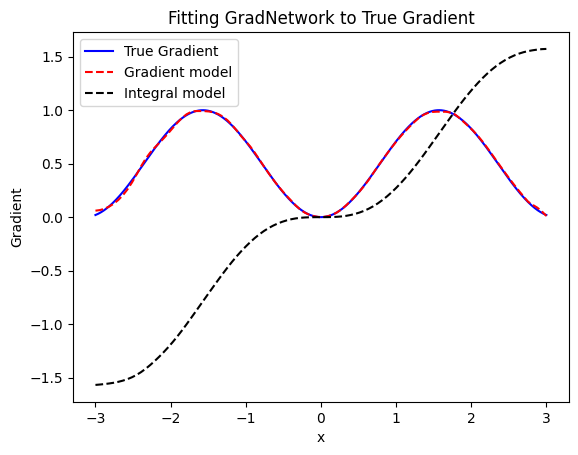

In [245]:
# Plot the results
x_test = torch.linspace(-3, 3, 100).unsqueeze(1)
x_test.requires_grad_(True)
grad_output_test = grad_network(x_test).detach()
model_output_test = model(x_test).detach()-model(torch.tensor([[0.]]))

plt.plot(x_train.detach().numpy(), true_grad.detach().numpy(), label='True Gradient', color='blue')
plt.plot(x_test.detach().numpy(), grad_output_test.detach().numpy(), label='Gradient model', color='red', linestyle='dashed')
plt.plot(x_test.detach().numpy(), model_output_test.detach().numpy(), label='Integral model', color='black', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('Gradient')
plt.legend()
plt.title('Fitting GradNetwork to True Gradient')
plt.show()

In [246]:
from os import cpu_count

cpu_count()

In [192]:
import torch
import torch.nn as nn
import torch.autograd as autograd

# Define the original integral network, Phi_theta(x)
class IntegralNetwork(nn.Module):
    def __init__(self):
        super(IntegralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 20)  # Example input and hidden layer size
        self.non_linearity1 = nn.Tanh()
        self.layer2 = nn.Linear(20, 10)
        self.non_linearity2 = nn.ReLU()
        self.output_layer = nn.Linear(10, 1)
        
    def forward(self, x):
        x = self.non_linearity1(self.layer1(x))
        x = self.non_linearity2(self.layer2(x))
        x = self.output_layer(x)
        return x

# Instantiate the integral network
phi_theta = IntegralNetwork()

# Define a function that builds the gradient network in a differentiable manner
class GradNetwork(nn.Module):
    def __init__(self, base_network):
        super(GradNetwork, self).__init__()
        self.base_network = base_network

    def forward(self, x, idx=0):
        # Compute the output of the original network
        output = self.base_network(x)
        
        # Compute the gradient of the output with respect to input feature x[idx]
        grad_outputs = torch.ones_like(output)
        gradient = autograd.grad(
            outputs=output,
            inputs=x,
            grad_outputs=grad_outputs,
            create_graph=True,  # Important for allowing second-order gradients
            retain_graph=True  # Keep graph for further operations
        )[0]
        
        # Extract the gradient with respect to the specified dimension
        grad_i = gradient[:, idx].unsqueeze(1)  # Assuming batch size and extracting the i-th dimension
        
        return grad_i

# Instantiate the gradient network
grad_network = GradNetwork(phi_theta)

# Example usage
# Create an example input tensor
x = torch.randn(5, 1, requires_grad=True)  # Batch size of 5, input dimension of 10

# Calculate gradient network output for index i = 2
i = 0
grad_i_output = grad_network(x, i)

# Perform a backward pass through the grad network
loss = grad_i_output.sum()  # Example loss that depends on the gradient output
loss.backward()

# Print gradients with respect to input x
print("Gradients with respect to x:", x.grad)


Gradients with respect to x: tensor([[-0.0865],
        [-0.0172],
        [-0.0127],
        [-0.0043],
        [-0.0488]])


In [114]:
grad_network = GradNetwork(model)

In [115]:
x = torch.randn(5, 1, requires_grad=True)  # Batch size of 5, input dimension of 10

# Calculate gradient network output for index i = 2
i = 0
grad_i_output = grad_network(x, i)

# Perform a backward pass through the grad network
loss = grad_i_output.sum()  # Example loss that depends on the gradient output
loss.backward()

# Print gradients with respect to input x
print("Gradients with respect to x:", x.grad)

Gradients with respect to x: tensor([[-0.6535],
        [-0.1991],
        [-0.1486],
        [-0.4705],
        [-0.5387]])


In [164]:
x = torch.randn(1,1, requires_grad=True)

In [112]:
model(x)

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[-0.1017]], grad_fn=<AddBackward0>)

In [113]:
torch.autograd.functional.hessian(model,x,False)


tensor([[[[-0.3172]]]])

In [162]:
phi_theta(x)

tensor([[-185.9069],
        [-182.0112],
        [-184.5193],
        [-185.7324],
        [-185.8689]], grad_fn=<AddmmBackward0>)

In [165]:
phi_theta(x).backward(retain_graph=True)
grad=x.grad
#grad.backward(retain_graph=True)


In [167]:
loss=grad
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [174]:
f

tensor(12., grad_fn=<AddBackward0>)

In [175]:
first_derivative

tensor(16., grad_fn=<CopyBackwards>)

In [176]:
torch.autograd.grad(first_derivative, x, create_graph=True)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [180]:
x = torch.tensor([[2.0]], requires_grad=True)
model(x)

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[-0.8762]], grad_fn=<AddBackward0>)

In [190]:
first_derivative[0]

tensor([[0.0434]], grad_fn=<SliceBackwardBackward0>)

In [191]:
import torch

# Define the variable
x = torch.tensor([[2.0]], requires_grad=True)

# Define the function
f =model(x)[0]

# First-order gradient (df/dx)
#f.backward(create_graph=True)  # Retain the computation graph to calculate higher-order gradients

# Access the first-order gradient
first_derivative = torch.autograd.grad(f, x, create_graph=True)
first_derivative[0].backward()
# Compute the second-order gradient (d^2f/dx^2)
second_derivative = x.grad

print("First derivative:", first_derivative)  # Should be 12.0 (3*x^2 at x = 2)
print("Second derivative:", second_derivative)  # Should be 12.0 (6*x at x = 2)


First derivative: (tensor([[0.0434]], grad_fn=<SliceBackwardBackward0>),)
Second derivative: tensor([[-0.0012]])


In [ ]:
.backward(retain_graph=True)

In [81]:
x.detach()

tensor([[-0.8100],
        [-1.4641],
        [ 1.0613],
        [-1.2123],
        [ 0.7789]])

In [90]:
x.grad

tensor([[-0.0238],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

In [83]:
x = torch.randn(5, 1, requires_grad=True)  # Batch size of 5, input dimension of 10


In [84]:
grad_network(x,0)[0].backward()

In [86]:
grad_network(x,0)

tensor([[-0.0664],
        [-0.0059],
        [-0.1011],
        [ 0.1018],
        [-0.0664]], grad_fn=<UnsqueezeBackward0>)